In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Dataset: Primary Care Facility Location
## Definition

As per the description of the dataset, a primary care facility is defined to be a location for which an individual can recieve primary medical care (care that is not classified as being in need of specialty analysis). These facilities are often hosptials or general primary care facilities (such as an Urgent Care or a Primary Care Physician)

## First Goal: Quantity of Primary Care Facilities in Each Definable Neighborhood

Given the relative abundance of primary care facilities, it is most practical to group them by ZIP-Code areas. Unfortunatley, this data set only contains ZIP-Code data, not the cities that those ZIP-Codes correspond to. Here the attempted solution is to bring in a new CSV that corresponds ZIP-Codes in Pennsylvania, create a hash table (dictionary in python) of these ZIP-Codes to Cities, so that the ZIP data in the primary care facility can be set to a city in the Greater Pittsburgh Area. This allows us to generate a Pandas DataFrame with the city name as the index, and with population, the quantity of primary care facilities, and the population-to-facility ratio as the rows.

In [15]:
zip_data = pd.read_csv("zip_pop.csv")

In [16]:
#new hash table/dictionary to keep track of cities of zip codes
zip_to_city = {}

#pivot data so that columns are zip
zip_to_city = zip_data.set_index('zip').T.to_dict()

In [17]:
#load primary care data
primary_c_data = pd.read_csv("data-primary-care-access-facilities.csv")

#sort by ZIP so we can count how many primary care facilities per city
primary_by_zip = primary_c_data.groupby("PRACTICE_ZIP").count()

In [56]:
# dictionaries of the 3 columns, population, facility count, and population to facility ratio
primary_zip_dict = {}
pop_dict = {}
fac_dict = {}
density_dict = {}

# iterate through each zip code
# make dictionaries for city and population, city and # of facilities, city and pop-fac ratio

# create new dataframe with cities and # of facilities

for index, row in primary_by_zip.iterrows():
    # get city name and population of zip code
    city = zip_to_city[index]['city']
    population = int(zip_to_city[index]['population'])
    
    
    #get number of facilities in 
    facilities = int(row['GROUP_NAME'])
    
    if city=='Pittsburgh':
        city = 'Downtown Pittsburgh'
    
    if city in pop_dict:
        pop_dict[city] += population
        fac_dict[city] += facilities
    else:
        pop_dict[city] = population
        fac_dict[city] = facilities
        
    density_dict[city] = int(pop_dict[city] / fac_dict[city])

# create dictionary of dictionaries to use to create pandas df
primary_zip_dict = {
    'Population': pop_dict,
    'PCF': fac_dict,
    'Ratio': density_dict
}

# creating new pandas dataframe with the cities and pc facility quantity and po
city_data = pd.DataFrame(primary_zip_dict)
city_data.index.names = ['City']

## Second Goal: Visualize Primary Care Facilities by City

With a new Pandas DataFrame containing the number of primary care facilities by city, the new goal will be to create some visualizations. It should be noted that 'PCF' is short for 'Primary Care Facilities.'

In [57]:
city_data.tail()

,Population,PCF,Ratio
City,,,
Turtle Creek,6982,3,2327
Monroeville,27541,30,918
Verona,16693,3,5564
Wilmerding,2423,1,2423
Downtown Pittsburgh,667081,373,1788


Text(0.5, 0, 'Primary Care Facility Count')

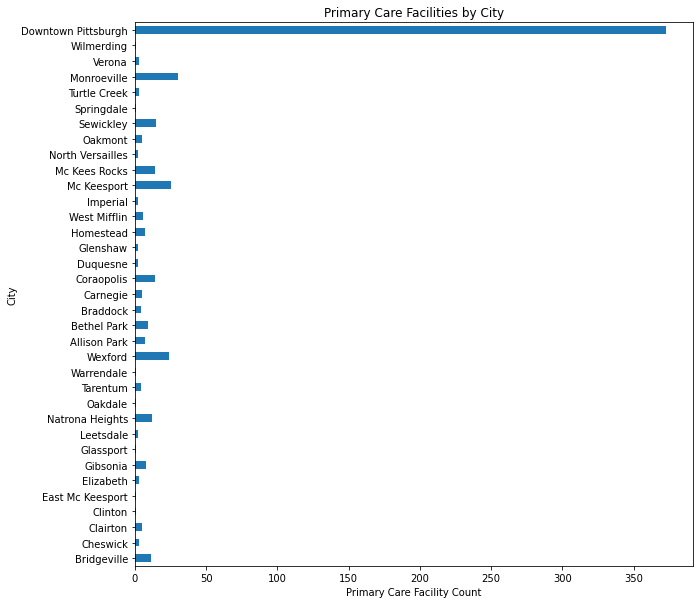

In [58]:
plt.figure(figsize=(10,10))
city_data['PCF'].plot.barh()

plt.title('Primary Care Facilities by City')
plt.xlabel("Primary Care Facility Count")

This isn't all too helpful, as the number of primary care facilities increases with population. It's much more efficient to look at a ratio of number of people per facility. This will give a much better indication as to "how much" care is accesible in a given neighborhood.

Text(0.5, 0, 'Population:Facility Ratio')

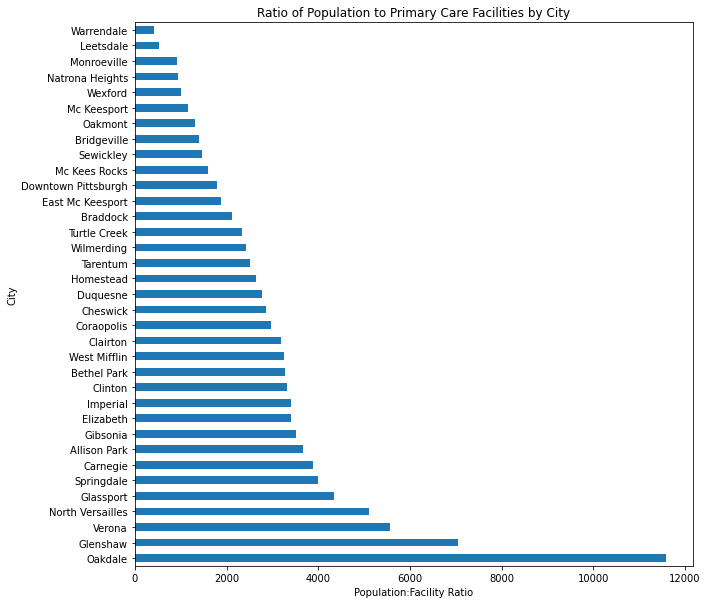

In [64]:
plt.figure(figsize=(10,10))


plt.title('Ratio of Population to Primary Care Facilities by City')
plt.xlabel("Population:Facility Ratio")

Now we see that cities like Warrendale, Leetsdale, Monroeville, Natrona Heights, and Wexford have ideal population to primary care facility ratios.

## Final Words on Primary Care Facilities

The most optimal way to judge the access to care is by looking at the population to primary care facility quantity ratio. This result is summarized in the table below, listing the ten best cities by this ratio in decending order.

In [70]:
sorted_data = city_data.sort_values(by='Ratio')
sorted_data.head(10)

,Population,PCF,Ratio
City,,,
Warrendale,422,1,422
Leetsdale,1063,2,531
Monroeville,27541,30,918
Natrona Heights,11280,12,940
Wexford,23970,24,998
Mc Keesport,28875,25,1155
Oakmont,6504,5,1300
Bridgeville,15363,11,1396
Sewickley,21966,15,1464
